#**DATA PREPARATION 2**

**Goal** : Preprocessing the data to be "machine learning" ready

**Steps**
1. Importing data prepared from data preparation 1 along withe the necessary libraries
2. Splitting the data set from onset to avoid bias
3. Converting all dtytpes into numeric dtypes
4. Handling missing values
5. Selecting relevant columns from ML data
6. Outlier detection
7. Handling data imbalance using SMOTE

## Computing the descriptors

In [ ]:
!pip install rdkit
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 790.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=fffd469565cec4bc088706872b464e92618c6fdae830d0ab64756bf0036e78b4
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Datasets/train_test_dataset.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,991,3423840.0,CNC1=C(N=CC=C1)C=NNC(=S)N,30.0,0
1,2104,3157186.0,CCCC1=C(C2=NC3=CC=CC=C3N2C(=C1)NCCOCCO)C#N,0.0,0
2,838,15945344.0,CCN(CC)C1=CC(=[N+]2CCCC2)CC(C1)(C)C.[I-],45.0,1
3,630,6603246.0,CCCCN1C2=C(CCC2)C(=N)C3=C1CCC3.I,61.0,1
4,1579,2963165.0,CC1=CC=C(C=C1)N2CC(CC2=O)C(=O)NC3=NC4=C(S3)C=C...,0.0,0
...,...,...,...,...,...
2099,946,16746116.0,CC[C@H](CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC...,36.0,1
2100,632,1150803.0,CC(C)(C)C1=CC=C(C=C1)C(=O)NC2=CC=C(C=C2)C(=O)N...,61.0,1
2101,2137,984185.0,C1COC2=C(O1)C=CC(=C2)C(=O)CSC3=NC4=C(C=NN4)C(=...,0.0,0
2102,1743,3220816.0,CN(C)C1=CC=C(C=C1)NC(=O)CN2CCC(CC2)NC(=O)C3CCCCC3,0.0,0


In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  calc = Calculator(descriptors, ignore_3D=True)
  return calc.pandas(data)


df_mordred = mordred_desc(mols)
df_mordred

  1%|          | 24/2104 [00:07<17:43,  1.96it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 18%|█▊        | 387/2104 [02:04<23:01,  1.24it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 2104/2104 [11:20<00:00,  3.09it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.077834,9.201443,0,0,17.14905,2.261219,4.522438,17.14905,1.224932,3.514331,...,9.027499,44.426561,209.073516,8.362941,340,16,62.0,67.0,5.333333,3.361111
1,18.849242,15.439912,0,0,32.46977,2.552219,4.984477,32.46977,1.298791,4.138898,...,10.143488,74.007649,338.174276,7.195197,1502,40,126.0,150.0,7.527778,5.916667
2,13.671986,12.603728,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,9.767611,65.172382,376.137547,7.836199,1800000580,25,92.0,106.0,divide by zero encountered in power (mZagreb1),4.055556
3,13.301778,12.268100,0,0,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,9.926178,66.956036,358.090597,8.733917,1700000468,27,92.0,113.0,divide by zero encountered in power (mZagreb1),3.833333
4,23.208972,17.870076,0,0,36.52827,2.455783,4.804579,36.52827,1.259596,4.313548,...,10.351533,80.841765,429.081698,8.939202,2505,45,160.0,189.0,10.173611,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,19.965399,16.675758,0,0,32.963854,2.487935,4.886614,32.963854,1.267841,4.180573,...,10.123306,74.855427,374.162187,7.635963,1648,40,134.0,157.0,9.0,5.861111
2100,22.473356,16.373610,0,0,36.890704,2.357078,4.714157,36.890704,1.272093,4.281432,...,10.135512,64.228135,387.194677,7.170272,2812,42,148.0,168.0,9.840278,6.305556
2101,23.977329,18.100251,0,0,40.553762,2.489971,4.939152,40.553762,1.351792,4.353994,...,10.423144,79.659554,420.089226,9.132374,2529,50,164.0,197.0,7.611111,6.527778
2102,21.569882,15.657518,0,1,35.974599,2.309411,4.618822,35.974599,1.284807,4.243021,...,9.991544,62.780610,386.268176,6.230132,2581,39,140.0,158.0,8.888889,6.222222


In [ ]:
df1 = df_mordred.copy()
df1.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def float_converter(x):
    if not isinstance(x, (float, int, bool)):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


# Apply the function to all columns in the DataFrame


In [ ]:
df2 =  df1.applymap(float_converter).copy()
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.077834,9.201443,0,0,17.149050,2.261219,4.522438,17.149050,1.224932,3.514331,...,9.027499,44.426561,209.073516,8.362941,340,16,62.0,67.0,5.333333,3.361111
1,18.849242,15.439912,0,0,32.469770,2.552219,4.984477,32.469770,1.298791,4.138898,...,10.143488,74.007649,338.174276,7.195197,1502,40,126.0,150.0,7.527778,5.916667
2,13.671986,12.603728,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,9.767611,65.172382,376.137547,7.836199,1800000580,25,92.0,106.0,NaN,4.055556
3,13.301778,12.268100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,9.926178,66.956036,358.090597,8.733917,1700000468,27,92.0,113.0,NaN,3.833333
4,23.208972,17.870076,0,0,36.528270,2.455783,4.804579,36.528270,1.259596,4.313548,...,10.351533,80.841765,429.081698,8.939202,2505,45,160.0,189.0,10.173611,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,19.965399,16.675758,0,0,32.963854,2.487935,4.886614,32.963854,1.267841,4.180573,...,10.123306,74.855427,374.162187,7.635963,1648,40,134.0,157.0,9.000000,5.861111
2100,22.473356,16.373610,0,0,36.890704,2.357078,4.714157,36.890704,1.272093,4.281432,...,10.135512,64.228135,387.194677,7.170272,2812,42,148.0,168.0,9.840278,6.305556
2101,23.977329,18.100251,0,0,40.553762,2.489971,4.939152,40.553762,1.351792,4.353994,...,10.423144,79.659554,420.089226,9.132374,2529,50,164.0,197.0,7.611111,6.527778
2102,21.569882,15.657518,0,1,35.974599,2.309411,4.618822,35.974599,1.284807,4.243021,...,9.991544,62.780610,386.268176,6.230132,2581,39,140.0,158.0,8.888889,6.222222


In [ ]:
# Apply the function to all columns in the DataFrame
df2.isnull().sum()[df2.isnull().sum() == 2104]

SpAbs_Dt     2104
SpMax_Dt     2104
SpDiam_Dt    2104
SpAD_Dt      2104
SpMAD_Dt     2104
             ... 
MINssssSn    2104
MINsPbH3     2104
MINssPbH2    2104
MINsssPbH    2104
MINssssPb    2104
Length: 96, dtype: int64

In [ ]:
empty_cols = df2.isnull().sum()[df2.isnull().sum() == 2104].index
df2.drop(empty_cols, axis = 1, inplace = True)
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.077834,9.201443,0,0,17.149050,2.261219,4.522438,17.149050,1.224932,3.514331,...,9.027499,44.426561,209.073516,8.362941,340,16,62.0,67.0,5.333333,3.361111
1,18.849242,15.439912,0,0,32.469770,2.552219,4.984477,32.469770,1.298791,4.138898,...,10.143488,74.007649,338.174276,7.195197,1502,40,126.0,150.0,7.527778,5.916667
2,13.671986,12.603728,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,9.767611,65.172382,376.137547,7.836199,1800000580,25,92.0,106.0,NaN,4.055556
3,13.301778,12.268100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,9.926178,66.956036,358.090597,8.733917,1700000468,27,92.0,113.0,NaN,3.833333
4,23.208972,17.870076,0,0,36.528270,2.455783,4.804579,36.528270,1.259596,4.313548,...,10.351533,80.841765,429.081698,8.939202,2505,45,160.0,189.0,10.173611,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,19.965399,16.675758,0,0,32.963854,2.487935,4.886614,32.963854,1.267841,4.180573,...,10.123306,74.855427,374.162187,7.635963,1648,40,134.0,157.0,9.000000,5.861111
2100,22.473356,16.373610,0,0,36.890704,2.357078,4.714157,36.890704,1.272093,4.281432,...,10.135512,64.228135,387.194677,7.170272,2812,42,148.0,168.0,9.840278,6.305556
2101,23.977329,18.100251,0,0,40.553762,2.489971,4.939152,40.553762,1.351792,4.353994,...,10.423144,79.659554,420.089226,9.132374,2529,50,164.0,197.0,7.611111,6.527778
2102,21.569882,15.657518,0,1,35.974599,2.309411,4.618822,35.974599,1.284807,4.243021,...,9.991544,62.780610,386.268176,6.230132,2581,39,140.0,158.0,8.888889,6.222222


In [ ]:
df2.to_csv("df_mordred.csv")

In [ ]:
from google.colab import files
files.download("df_mordred.csv")

# # save directly to drive
# #!cp "df.mordred.csv" ""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Datasets/train_test_dataset.csv"
url_mordred = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/df_mordred.csv"

url_raw_complete = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Datasets/Assayresults_preprocessed.csv"
url_complete = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/f2805f833c826a3935f31f202d87f5c454388e90/df_mordred.csv"

In [ ]:
df_mordred = pd.read_csv(url_complete, index_col = 0)
df_raw = pd.read_csv(url_raw_complete)

In [ ]:
df_mordred

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
df_raw

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
X = df_mordred
y = df_raw["Activity_outcome"]
Y = df_raw["Activity_score"]

## Splitting and Imputing preprocessor

 **Splitting the Dataset**

 The data set is splitted from the onset to prevent a look ahead bias

 "The purpose of Computation is *insight* not *numbers*" -Richard Hamming

In [ ]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=15)

In [ ]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1925,20.482236,15.934713,0,0,35.071854,2.512657,4.881836,35.071854,1.348917,4.200445,...,10.183730,75.372284,349.179027,7.126103,1734,41,138.0,164.0,6.888889,5.750000
505,21.638832,16.085455,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.085851,63.992488,433.121149,8.020762,2800002438,41,142.0,162.0,NaN,6.166667
1493,12.158715,10.443317,0,0,20.516822,2.326846,4.653693,20.516822,1.282301,3.686090,...,9.437874,47.920298,215.069477,8.602779,447,21,78.0,88.0,4.944444,3.638889
733,16.527024,13.226854,0,0,27.003573,2.431030,4.830342,27.003573,1.285884,3.983162,...,10.010412,63.026880,301.113650,7.527841,914,37,112.0,132.0,6.618056,4.527778
320,18.050928,16.072118,0,0,29.856304,2.423571,4.767668,29.856304,1.244013,4.083346,...,10.006540,72.563259,330.121572,7.860037,1442,38,120.0,141.0,10.000000,5.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,19.965399,16.675758,0,0,32.963854,2.487935,4.886614,32.963854,1.267841,4.180573,...,10.123306,74.855427,374.162187,7.635963,1648,40,134.0,157.0,9.000000,5.861111
630,22.473356,16.373610,0,0,36.890704,2.357078,4.714157,36.890704,1.272093,4.281432,...,10.135512,64.228135,387.194677,7.170272,2812,42,148.0,168.0,9.840278,6.305556
2133,23.977329,18.100251,0,0,40.553762,2.489971,4.939152,40.553762,1.351792,4.353994,...,10.423144,79.659554,420.089226,9.132374,2529,50,164.0,197.0,7.611111,6.527778
1739,21.569882,15.657518,0,1,35.974599,2.309411,4.618822,35.974599,1.284807,4.243021,...,9.991544,62.780610,386.268176,6.230132,2581,39,140.0,158.0,8.888889,6.222222


**Handling missing values**

mean?, mode?, median?, interpolation?...

"https://www.sciencedirect.com/science/article/pii/S0895435618308710"

"To ask the right question is harder than to answer it" - George Cantor

In [ ]:
# #All columns that contains missing values and the amount of missing values they contain
# X_train.isnull().sum()[X_train.isnull().sum() != 0 ]

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [ ]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy = "mean")
# imputer.fit(X_train)
# X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
# X_train

In [ ]:
# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [ ]:
# X_train.isnull().sum()[X_train.isnull().sum() != 0]

In [ ]:
# Preprocessing pipeline

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer


preprocessor = Pipeline([
              ("Imputation", SimpleImputer(strategy = "mean"))
])

preprocessor.fit(X_train)



Pipeline(steps=[('Imputation', SimpleImputer())])

In [ ]:
X_train = pd.DataFrame(preprocessor.transform(X_train), columns = X_train.columns)
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,20.482236,15.934713,0.0,0.0,35.071854,2.512657,4.881836,35.071854,1.348917,4.200445,...,10.183730,75.372284,349.179027,7.126103,1.734000e+03,41.0,138.0,164.0,6.888889,5.750000
1,21.638832,16.085455,0.0,1.0,33.724737,2.443935,4.831111,33.724737,1.286329,4.164896,...,10.085851,63.992488,433.121149,8.020762,2.800002e+09,41.0,142.0,162.0,8.747166,6.166667
2,12.158715,10.443317,0.0,0.0,20.516822,2.326846,4.653693,20.516822,1.282301,3.686090,...,9.437874,47.920298,215.069477,8.602779,4.470000e+02,21.0,78.0,88.0,4.944444,3.638889
3,16.527024,13.226854,0.0,0.0,27.003573,2.431030,4.830342,27.003573,1.285884,3.983162,...,10.010412,63.026880,301.113650,7.527841,9.140000e+02,37.0,112.0,132.0,6.618056,4.527778
4,18.050928,16.072118,0.0,0.0,29.856304,2.423571,4.767668,29.856304,1.244013,4.083346,...,10.006540,72.563259,330.121572,7.860037,1.442000e+03,38.0,120.0,141.0,10.000000,5.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,19.965399,16.675758,0.0,0.0,32.963854,2.487935,4.886614,32.963854,1.267841,4.180573,...,10.123306,74.855427,374.162187,7.635963,1.648000e+03,40.0,134.0,157.0,9.000000,5.861111
1632,22.473356,16.373610,0.0,0.0,36.890704,2.357078,4.714157,36.890704,1.272093,4.281432,...,10.135512,64.228135,387.194677,7.170272,2.812000e+03,42.0,148.0,168.0,9.840278,6.305556
1633,23.977329,18.100251,0.0,0.0,40.553762,2.489971,4.939152,40.553762,1.351792,4.353994,...,10.423144,79.659554,420.089226,9.132374,2.529000e+03,50.0,164.0,197.0,7.611111,6.527778
1634,21.569882,15.657518,0.0,1.0,35.974599,2.309411,4.618822,35.974599,1.284807,4.243021,...,9.991544,62.780610,386.268176,6.230132,2.581000e+03,39.0,140.0,158.0,8.888889,6.222222


## **Feature Selection**

**Goal** : To select the most statistically relevant columns


Article link: "https://www.sciencedirect.com/science/article/pii/S0016236122006950#:~:text=The%20method%20focuses%20on%20reducing%20the%20number%20of,identify%20dominant%20chemical-structure%20features%20that%20impact%20property%20values."

In [ ]:
#removing low_variance columns

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
selector.fit(X_train)

mask = selector.get_support()
high_var_cols = X_train.columns[mask]

X_train_var= X_train[high_var_cols].copy()
X_train_var

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpAD_A,VE1_A,VR1_A,VR2_A,VR3_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,20.482236,15.934713,0.0,0.0,35.071854,35.071854,3.967264,578.334610,22.243639,7.315664,...,10.183730,75.372284,349.179027,7.126103,1.734000e+03,41.0,138.0,164.0,6.888889,5.750000
1,21.638832,16.085455,0.0,1.0,33.724737,33.724737,4.152498,5170.655227,110.043193,6.769233,...,10.085851,63.992488,433.121149,8.020762,2.800002e+09,41.0,142.0,162.0,8.747166,6.166667
2,12.158715,10.443317,0.0,0.0,20.516822,20.516822,3.633555,83.141235,5.196327,4.890544,...,9.437874,47.920298,215.069477,8.602779,4.470000e+02,21.0,78.0,88.0,4.944444,3.638889
3,16.527024,13.226854,0.0,0.0,27.003573,27.003573,4.121754,130.897651,6.233221,5.616353,...,10.010412,63.026880,301.113650,7.527841,9.140000e+02,37.0,112.0,132.0,6.618056,4.527778
4,18.050928,16.072118,0.0,0.0,29.856304,29.856304,3.823930,256.509849,10.687910,6.422636,...,10.006540,72.563259,330.121572,7.860037,1.442000e+03,38.0,120.0,141.0,10.000000,5.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,19.965399,16.675758,0.0,0.0,32.963854,32.963854,4.047858,305.745452,11.759440,6.678264,...,10.123306,74.855427,374.162187,7.635963,1.648000e+03,40.0,134.0,157.0,9.000000,5.861111
1632,22.473356,16.373610,0.0,0.0,36.890704,36.890704,4.452620,475.386892,16.392651,7.228840,...,10.135512,64.228135,387.194677,7.170272,2.812000e+03,42.0,148.0,168.0,9.840278,6.305556
1633,23.977329,18.100251,0.0,0.0,40.553762,40.553762,4.193960,582.454456,19.415149,7.465863,...,10.423144,79.659554,420.089226,9.132374,2.529000e+03,50.0,164.0,197.0,7.611111,6.527778
1634,21.569882,15.657518,0.0,1.0,35.974599,35.974599,4.955499,179.262120,6.402219,6.218469,...,9.991544,62.780610,386.268176,6.230132,2.581000e+03,39.0,140.0,158.0,8.888889,6.222222


In [ ]:
def correlation(dataset, threshold):
  col_corr = set()  #Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train_var, 0.9)
col_names = list(X_train_var.drop(corr_features, axis = 1).columns)
len(col_names)

346

In [ ]:
X_train = X_train[col_names].copy()
X_train

,ABC,nAcid,nBase,VE1_A,VR1_A,VR3_A,nAromAtom,nBridgehead,nHetero,nN,...,n10FaRing,nFARing,nG12FARing,nRot,SLogP,TopoPSA(NO),SRW05,TSRW10,AMW,WPath
0,20.482236,0.0,0.0,3.967264,578.334610,7.315664,12.0,0.0,5.0,3.0,...,0.0,1.0,0.0,4.0,3.30010,62.30,2.397895,75.372284,7.126103,1.734000e+03
1,21.638832,0.0,1.0,4.152498,5170.655227,6.769233,12.0,0.0,6.0,1.0,...,0.0,0.0,0.0,5.0,5.29520,46.61,0.000000,63.992488,8.020762,2.800002e+09
2,12.158715,0.0,0.0,3.633555,83.141235,4.890544,12.0,0.0,5.0,3.0,...,0.0,0.0,0.0,3.0,2.73340,68.06,0.000000,47.920298,8.602779,4.470000e+02
3,16.527024,0.0,0.0,4.121754,130.897651,5.616353,12.0,0.0,4.0,1.0,...,0.0,1.0,0.0,2.0,2.78452,37.38,0.000000,63.026880,7.527841,9.140000e+02
4,18.050928,0.0,0.0,3.823930,256.509849,6.422636,11.0,0.0,7.0,2.0,...,0.0,0.0,0.0,6.0,3.07274,91.44,2.397895,72.563259,7.860037,1.442000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,19.965399,0.0,0.0,4.047858,305.745452,6.678264,15.0,0.0,8.0,6.0,...,0.0,0.0,0.0,7.0,3.98700,87.89,2.397895,74.855427,7.635963,1.648000e+03
1632,22.473356,0.0,0.0,4.452620,475.386892,7.228840,18.0,0.0,5.0,3.0,...,0.0,0.0,0.0,5.0,4.56140,71.09,0.000000,64.228135,7.170272,2.812000e+03
1633,23.977329,0.0,0.0,4.193960,582.454456,7.465863,21.0,0.0,9.0,4.0,...,0.0,1.0,0.0,5.0,2.85500,99.10,2.397895,79.659554,9.132374,2.529000e+03
1634,21.569882,0.0,1.0,4.955499,179.262120,6.218469,6.0,0.0,6.0,4.0,...,0.0,0.0,0.0,6.0,2.85200,64.68,0.000000,62.780610,6.230132,2.581000e+03


# **Data Imbalance**

In [ ]:
print(f"Total number of compounds: {y_train.count()} \nTotal actives: {y_train[y_train == 1].count()} \nTotal inactives: {y_train[y_train == 0].count()}")

Total number of compounds: 1636 
Total actives: 695 
Total inactives: 941


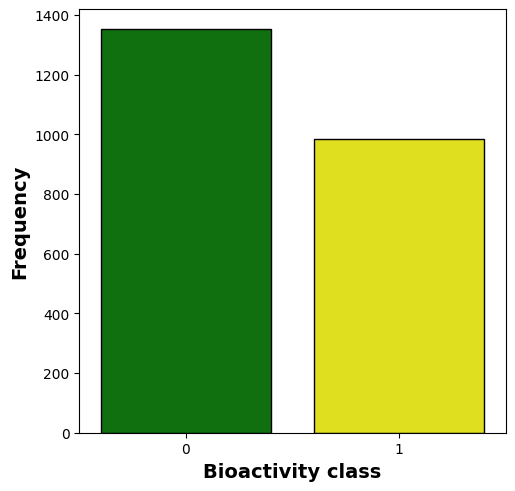

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5.5, 5.5))

sns.countplot(x ="Activity_outcome" , data=df_raw, edgecolor='black', palette=['green', 'yellow'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')
plt.show()


In [ ]:
#resampling our data using SMOTE

from imblearn.over_sampling import SMOTE
# assume X is your feature matrix and y is your target vector
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

,ABC,nAcid,nBase,VE1_A,VR1_A,VR3_A,nAromAtom,nBridgehead,nHetero,nN,...,n10FaRing,nFARing,nG12FARing,nRot,SLogP,TopoPSA(NO),SRW05,TSRW10,AMW,WPath
0,20.482236,0.000000,0.0,3.967264,578.334610,7.315664,12.000000,0.0,5.000000,3.000000,...,0.000000,1.000000,0.000000,4.000000,3.300100,62.300000,2.397895,75.372284,7.126103,1.734000e+03
1,21.638832,0.000000,1.0,4.152498,5170.655227,6.769233,12.000000,0.0,6.000000,1.000000,...,0.000000,0.000000,0.000000,5.000000,5.295200,46.610000,0.000000,63.992488,8.020762,2.800002e+09
2,12.158715,0.000000,0.0,3.633555,83.141235,4.890544,12.000000,0.0,5.000000,3.000000,...,0.000000,0.000000,0.000000,3.000000,2.733400,68.060000,0.000000,47.920298,8.602779,4.470000e+02
3,16.527024,0.000000,0.0,4.121754,130.897651,5.616353,12.000000,0.0,4.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,2.784520,37.380000,0.000000,63.026880,7.527841,9.140000e+02
4,18.050928,0.000000,0.0,3.823930,256.509849,6.422636,11.000000,0.0,7.000000,2.000000,...,0.000000,0.000000,0.000000,6.000000,3.072740,91.440000,2.397895,72.563259,7.860037,1.442000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,16.999364,0.750615,1.0,4.152498,5170.655227,6.769233,16.508607,0.0,2.997541,1.000000,...,0.000000,0.249385,0.249385,1.501230,1.292300,18.414172,0.759259,60.461902,8.040952,2.100001e+09
1878,19.206425,0.000000,0.0,4.354938,222.785236,6.284364,17.227339,0.0,5.965826,3.386331,...,0.000000,0.000000,0.000000,5.000000,2.571468,78.088643,0.663327,62.696609,7.957642,1.599706e+03
1879,26.466864,0.000000,1.0,4.553529,809.867731,7.917612,18.018990,0.0,8.018990,3.028485,...,0.000000,0.000000,0.000000,7.981010,3.869474,87.901223,0.000000,70.210746,7.607818,4.083573e+03
1880,20.302292,0.000000,0.0,4.272137,311.523534,6.693099,15.174765,0.0,7.063088,3.825235,...,0.587382,0.000000,0.000000,5.587382,2.209291,95.675992,1.416924,68.289176,7.512796,1.705642e+03


In [ ]:
print(f"Total number of compounds: {y_resampled.count()} \nTotal actives: {y_resampled[y_resampled == 1].count()} \nTotal inactives: {y_resampled[y_resampled == 0].count()}")

Total number of compounds: 1882 
Total actives: 941 
Total inactives: 941


Data Scaling

In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state = 42)

rfe = RFECV(estimator, cv = 5, n_jobs = -1)
rfe.fit(X_resampled, y_resampled)

KeyboardInterrupt: ignored

In [ ]:
rfe.get_support()

AttributeError: ignored

In [ ]:
rfe_support_mask = ([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
len(rfe_support_mask)

346

In [ ]:
len(X_resampled.columns)

346

In [ ]:
rfe_cols = X_resampled.columns[rfe_support_mask]
len(rfe_cols)

320

In [ ]:
X_resampled  = X_resampled[rfe_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_resampled)

X_resampled = pd.DataFrame(scaler.transform(X_resampled), columns = X_resampled.columns)

In [ ]:
X_resampled

,ABC,nAcid,nBase,VE1_A,VR1_A,VR3_A,nAromAtom,nHetero,nN,nO,...,nFRing,nG12FRing,n10FaRing,nRot,SLogP,TopoPSA(NO),SRW05,TSRW10,AMW,WPath
0,0.027631,-0.322332,-0.459480,-0.482546,-0.058734,0.468437,-0.291490,-0.764567,0.088766,-0.501766,...,0.685654,-0.458446,-0.359564,-0.271347,0.194132,-0.435657,0.614762,0.463478,-1.041169,-0.238895
1,0.242335,-0.322332,1.428105,-0.010821,-0.006302,0.018114,-0.291490,-0.383767,-1.200920,-0.067865,...,-1.054185,-0.458446,-0.359564,0.132283,1.635735,-0.859171,-1.205592,-0.525490,-0.265597,0.649150
2,-1.517502,-0.322332,-0.459480,-1.332386,-0.064387,-1.530147,-0.291490,-0.764567,0.088766,-0.501766,...,-1.054185,-0.458446,-0.359564,-0.674976,-0.215349,-0.280179,-1.205592,-1.922253,0.238948,-0.238895
3,-0.706593,-0.322332,-0.459480,-0.089114,-0.063842,-0.931995,-0.291490,-1.145368,-1.200920,-0.501766,...,0.685654,-0.458446,-0.359564,-1.078605,-0.178411,-1.108313,-1.205592,-0.609407,-0.692906,-0.238895
4,-0.423704,-0.322332,-0.459480,-0.847569,-0.062408,-0.267523,-0.478479,-0.002966,-0.556077,0.799938,...,-1.054185,-0.458446,-0.359564,0.535912,0.029849,0.350909,0.614762,0.219358,-0.404928,-0.238895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,-0.618910,0.985156,1.428105,-0.010821,-0.006302,0.018114,0.551573,-1.527105,-1.200920,-0.936734,...,0.685654,2.201731,-0.359564,-1.279923,-1.256647,-1.620251,-0.629203,-0.832318,-0.248095,0.427139
1878,-0.209204,-0.322332,-0.459480,0.504724,-0.062793,-0.381476,0.685969,-0.396780,0.337889,-0.250322,...,-0.718108,-0.458446,-0.359564,0.132283,-0.332356,-0.009479,-0.702029,-0.638109,-0.320315,-0.238895
1879,1.138584,-0.322332,1.428105,1.010466,-0.056090,0.964513,0.833999,0.385066,0.107134,0.361917,...,-1.037665,-0.433188,-0.359564,1.335505,0.605546,0.255388,-1.205592,0.014912,-0.623574,-0.238894
1880,-0.005773,-0.322332,-0.459480,0.293858,-0.061780,-0.044630,0.302158,0.021058,0.620913,0.035340,...,0.685654,-0.458446,1.484649,0.369367,-0.594055,0.465250,-0.129939,-0.152084,-0.705949,-0.238895


In [ ]:
#preprocessing the X_test

X_test = pd.DataFrame(preprocessor.transform(X_test), columns = X_test.columns)
X_test = X_test[rfe_cols]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_resampled.columns)

In [ ]:
X_test

,ABC,nAcid,nBase,VE1_A,VR1_A,VR3_A,nAromAtom,nHetero,nN,nO,...,nFRing,nG12FRing,n10FaRing,nRot,SLogP,TopoPSA(NO),SRW05,TSRW10,AMW,WPath
0,3.274999,-0.322332,-0.459480,1.888979,-0.037399,2.179447,-0.291490,2.662640,1.378452,2.101642,...,0.685654,-0.458446,-0.359564,2.554058,0.372839,2.148619,-1.205592,1.486712,-0.921893,-0.238893
1,1.332757,-0.322332,-0.459480,1.830267,-0.059714,0.557050,2.326365,0.377835,0.733609,-0.067865,...,0.685654,-0.458446,2.780152,0.535912,2.147171,0.184094,1.915164,1.797802,0.470674,-0.238894
2,0.589367,-0.322332,-0.459480,-0.093366,-0.059292,0.513571,-1.413428,0.377835,0.088766,0.799938,...,0.685654,-0.458446,-0.359564,-0.271347,-0.680829,0.262913,0.614762,0.933982,-1.118004,-0.238895
3,-0.161177,-0.322332,-0.459480,-0.825927,-0.060686,0.147271,-1.413428,0.377835,0.088766,0.366037,...,-1.054185,-0.458446,-0.359564,-0.271347,-0.513829,0.225393,1.105647,0.504090,0.101437,-0.238895
4,-0.992448,-0.322332,-0.459480,-0.729803,-0.063545,-0.822802,-1.413428,-1.145368,-0.556077,-0.501766,...,-1.054185,-0.458446,-0.359564,-1.078605,-0.016295,-0.431608,-1.205592,-1.490315,-0.064438,-0.238895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,-0.209297,-0.322332,1.428105,-0.010821,-0.006302,0.018114,0.456469,-0.002966,0.733609,-0.501766,...,0.685654,2.201731,-0.359564,-0.271347,-0.355383,-0.231322,0.614762,0.372332,-0.163026,0.522286
698,0.789679,-0.322332,-0.459480,0.913408,-0.060662,0.355022,0.643459,0.758636,2.023295,-0.067865,...,-1.054185,-0.458446,-0.359564,2.150429,0.216460,0.937999,0.614762,0.907412,-1.091231,-0.238894
699,-0.754657,-0.322332,-0.459480,-0.221722,-0.063856,-0.939702,-0.852459,0.758636,1.378452,0.366037,...,0.685654,-0.458446,-0.359564,-1.078605,-3.276681,1.943475,1.105647,0.144671,0.203310,-0.238895
700,0.489417,-0.322332,-0.459480,0.776746,-0.062327,-0.117889,-2.535366,-0.764567,-1.845764,0.799938,...,0.685654,2.201731,-0.359564,-1.482234,-0.329732,0.230792,1.105647,0.982692,-1.762335,-0.238895


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
evaluate(X_test, y_test, rfc)

NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

XGB = GradientBoostingClassifier()
XGB.fit(X_resampled, y_resampled)

evaluate(X_test, y_test, XGB)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)
evaluate(X_test, y_test, LR_clf)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_resampled, y_resampled)

evaluate(X_test, y_test, gnb)

# Applicability Domain Analysis using standardization Approach

Article: https://www.sciencedirect.com/science/article/pii/S0169743915000969

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardized_similarity(X_tain, X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)


  mean_htrain = np.mean(scaler.transform(X_train), axis=1)
  std_htrain = np.std(scaler.transform(X_train), axis=1)

  s_new_train = (mean_htrain + 1.28 * std_htrain)


  # for test data
  mean_htest = np.mean(scaler.transform(X_test), axis = 1)
  std_htest = np.std(scaler.transform(X_test), axis = 1)

  s_new_test = (mean_htest + 1.28 * std_htest)
  return [s_new_train, s_new_test]

def visualize_AD(value):
  plt.plot(value[0], "bo", color = "b")
  plt.plot(value[1], "bo", color = "g")
  plt.axhline(y = 3, color='r', linestyle='-', linewidth = 2.0)  #plots a horizontal line to denote the max and min y threshold


  plt.xlabel("Compound ID")
  plt.ylabel("Leverage")
  plt.title("Applicability Domain")
  plt.show()


def isWithinAD(X_train, X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)

  AD_identity = []

  mean_htest = np.mean(scaler.transform(X_test), axis = 1)
  std_htest = np.std(scaler.transform(X_test), axis = 1)

  s_new_test = (mean_htest + 1.28 * std_htest)


  return s_new_test < 3

In [ ]:
standardized_similarity(X_resampled, X_test)

ValueError: ignored

# preprocessing pipeline

In [ ]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=15)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", col_names)
    ]
)

preprocess_pipeline = Pipeline([
              ("preprocessor", Column_selector),
              ("Imputation", SimpleImputer(strategy = "mean")),
              ("Removing low variance features", VarianceThreshold(threshold = 0.1)),
              ("Scaling", StandardScaler()),
              #("RFE", RFE(RandomForestClassifier(n_estimators = 1000, random_state = 42)))
])


# define pipeline for handling dataImbalance
from imblearn.pipeline import Pipeline as imb_Pipeline

sm_pipeline = imb_Pipeline([
           ("Data Imbalance", SMOTE(random_state = 42, k_neighbors = 5))
])

preprocess_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  ['ABC', 'nAcid', 'nBase',
                                                   'VE1_A', 'VR1_A', 'VR3_A',
                                                   'nAromAtom', 'nBridgehead',
                                                   'nHetero', 'nN', 'nO', 'nS',
                                                   'nF', 'nCl', 'nX', 'ATS0dv',
                                                   'ATS0s', 'ATS3s', 'ATS0Z',
                                                   'ATS0p', 'AATS0dv',
                                                   'AATS7dv', 'AATS8dv',
                                                   'AATS0d', 'AATS3d', 'AATS4d',
                                                   'AATS5d', 'AATS6d', 'AATS7d',
                                                   'AATS8d', ...])])),
                ('Imputation', SimpleImputer()),
                ('Removing low variance features',
                 VarianceThreshold(threshold=0.1)),
                ('Scaling', StandardScaler())])

In [ ]:
#transforming the datasets
transformed_X_train = preprocess_pipeline.transform(X_train)
transformed_X_test = preprocess_pipeline.transform(X_test)

#adding the smote pipeline to handle the data Imbalance in transformed X_train
X_train_resampled, y_train_resampled = sm_pipeline.fit_resample(transformed_X_train, y_train)

In [ ]:
pd.DataFrame(X_train_resampled, columns = col_names)

,ABC,nAcid,nBase,VE1_A,VR1_A,VR3_A,nAromAtom,nBridgehead,nHetero,nN,...,n10FaRing,nFARing,nG12FARing,nRot,SLogP,TopoPSA(NO),SRW05,TSRW10,AMW,WPath
0,0.021411,-0.308161,-0.431974,-4.639880e-01,-0.054636,4.492980e-01,-0.293783,-0.124799,-0.798566,0.064162,...,-0.353999,1.525545,-0.350714,-0.296988,0.186942,-0.468134,0.591448,0.449200,-1.037296,-0.222681
1,0.237495,-0.308161,1.472904,-2.224782e-15,0.000000,-7.302970e-16,-0.293783,-0.124799,-0.419884,-1.208181,...,-0.353999,-0.584169,-0.350714,0.104892,1.616609,-0.895827,-1.202457,-0.535719,-0.273977,0.726120
2,-1.533653,-0.308161,-0.431974,-1.299890e+00,-0.060528,-1.544736e+00,-0.293783,-0.124799,-0.798566,0.064162,...,-0.353999,-0.584169,-0.350714,-0.698869,-0.219149,-0.311123,-1.202457,-1.926763,0.222597,-0.222681
3,-0.717532,-0.308161,-0.431974,-7.700849e-02,-0.059959,-9.479458e-01,-0.293783,-0.124799,-1.177248,-1.208181,...,-0.353999,1.525545,-0.350714,-1.100749,-0.182517,-1.147426,-1.202457,-0.619292,-0.694535,-0.222681
4,-0.432825,-0.308161,-0.431974,-8.230242e-01,-0.058465,-2.849868e-01,-0.482338,-0.124799,-0.041201,-0.572010,...,-0.353999,-0.584169,-0.350714,0.506772,0.024019,0.326190,0.591448,0.206080,-0.411107,-0.222681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,-0.167280,-0.308161,0.043074,-4.408268e-01,-0.042863,6.303343e-02,-0.717453,-0.124799,-0.419884,-1.208181,...,-0.353999,-0.058037,0.422742,-0.094566,-0.339340,-0.152760,1.075201,0.475498,-0.730625,-0.045218
1878,-0.550702,-0.308161,-0.431974,7.863544e-02,-0.059417,-7.543580e-01,-0.220938,-0.124799,0.789311,1.336505,...,-0.353999,-0.584169,-0.350714,-0.867861,-2.984416,1.157590,1.366566,0.302139,0.138601,-0.222681
1879,0.191947,-0.308161,-0.413888,5.839798e-01,-0.058380,-1.928932e-01,1.027897,-0.124799,0.719758,1.342545,...,-0.353999,-0.584169,-0.350714,-0.687421,-0.198874,1.267340,0.574416,0.582833,0.617056,-0.222681
1880,-0.052050,-0.308161,-0.431974,3.807069e-01,-0.058422,-2.045525e-01,0.460440,-0.124799,-0.954817,-0.198334,...,2.726548,-0.584169,-0.350714,0.340949,0.768832,-0.418438,-1.202457,-0.784917,-1.113937,-0.222681


In [ ]:
from sklearn.feature_selection import RFECV

estimator  = RandomForestClassifier(random_state = 140)
rfe = RFECV(estimator, step = 1, cv = 5)

rfe.fit(pd.DataFrame(X_train_resampled, columns = col_names), y_train_resampled)

KeyboardInterrupt: ignored

# Evaluation metrics

In [ ]:
def evaluate(X_test, y_test, model, title="model"):
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import roc_auc_score
    import pandas as pd

    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    TP = sum((y_pred == 1) & (y_test == 1))
    TN = sum((y_pred == 0) & (y_test == 0))
    FP = sum((y_pred == 1) & (y_test == 0))
    FN = sum((y_pred == 0) & (y_test == 1))

    accuracy = (TP + TN) / (TP + TN + FN + FP)
    sensitivity = (TP) / (TP + FN)
    specificity = (TN) / (TN + FP)
    precision = (TP) / (TP + FP)
    F1 = 2 * ((precision * sensitivity) / (precision + sensitivity))
    balanced_accuracy = (sensitivity + specificity) / 2
    mcc = matthews_corrcoef(y_test, y_pred)
    AUCROC = roc_auc_score(y_test, pred_proba)

    values = [accuracy, sensitivity, specificity, precision, F1, balanced_accuracy, mcc, AUCROC]
    index = ["accuracy", "sensitivity", "specificity", "precision", "F1", "balanced_accuracy", "MCC", "auc_roc"]

    return pd.DataFrame({"scores": values}, index=index)


def plot_roc(X_test, y_test, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, roc_auc_score

    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

    # Calculate the AUC
    roc_auc = roc_auc_score(y_test, pred_proba)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, labe0l='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier


# Define and train the model
rfc = RandomForestClassifier(n_estimators = 700, random_state = 140)
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=700, random_state=140)

In [ ]:
evaluate(transformed_X_test, y_test, rfc)

,scores
accuracy,0.821937
sensitivity,0.738832
specificity,0.880779
precision,0.814394
F1,0.774775
balanced_accuracy,0.809805
MCC,0.630154
auc_roc,0.899386


In [ ]:
evaluate(transformed_X_test, y_test, rfc)

,scores
accuracy,0.833333
sensitivity,0.769759
specificity,0.878345
precision,0.817518
F1,0.792920
balanced_accuracy,0.824052
MCC,0.654509
auc_roc,0.899478


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_resampled)


xgb = GradientBoostingClassifier(n_estimators = 700, learning_rate = 0.1, random_state = 1)
xgb.fit(scaler.transform(X_train_resampled), y_train_resampled)

GradientBoostingClassifier(n_estimators=700, random_state=1)

In [ ]:
evaluate(transformed_X_test, y_test, xgb)

,scores
accuracy,0.814815
sensitivity,0.745704
specificity,0.863747
precision,0.794872
F1,0.769504
balanced_accuracy,0.804726
MCC,0.615881
auc_roc,0.891782


In [ ]:
from sklearn.svm import SVC


svc = SVC(kernel = "poly", degree =3, coef0 =1.0, probability = True)
svc.fit(scaler.transform(X_train_resampled), y_train_resampled)

SVC(coef0=1.0, kernel='poly', probability=True)

In [ ]:
evaluate(scaler.transform(transformed_X_test), y_test, svc)

,scores
accuracy,0.824786
sensitivity,0.783505
specificity,0.854015
precision,0.791667
F1,0.787565
balanced_accuracy,0.818760
MCC,0.638505
auc_roc,0.880544


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit()